###  Colab Activity 14.3: Using Entropy

**Expected Time = 60 minutes**


This activity focuses on using *entropy* to split nodes in a Decision Tree.  First, you will compute entropy by hand on a small example dataset.  Next, you will use the `DecisionTreeClassifier` to split based on an entropy criteria. 


$$\displaystyle H=-\sum _{i}p_{i}\log p_{i}$$

#### Index

- [Problem 1](#-Problem-1)
- [Problem 2](#-Problem-2)
- [Problem 3](#-Problem-3)
- [Problem 4](#-Problem-4)
- [Problem 5](#-Problem-5)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
from sklearn.model_selection import train_test_split

### Sample Data

Below, the same small titanic dataset is created for your with five rows, and assigned as `titanic` below.  

In [2]:
titanic = sns.load_dataset('titanic')[['age', 'pclass', 'survived']].head()

In [3]:
titanic

,age,pclass,survived
0,22.0,3,0
1,38.0,1,1
2,26.0,3,1
3,35.0,1,1
4,35.0,3,0


In [3]:
X, y = titanic.drop('survived', axis = 1), titanic.survived

[Back to top](#-Index)

### Problem 1

#### Computing the Entropy


To begin, the entropy of the data is determined by computing the probability for each class and plugging it into the `entropy` formula.  Use the data in `df` to compute the entropy for all the data and assign it as a float to `all_entropy` below. 

**NOTE**:  use `np.log2` to compute the logarithm. 

In [5]:


all_entropy = ''


p1 = 3/5  # probability of survival
p0 = 2/5  # probability of not survival
all_entropy = -(p0 * np.log2(p0) + p1 * np.log2(p1))


# Answer check
print(all_entropy)

0.9709505944546686


[Back to top](#-Index)

### Problem 2

#### Splitting Data


Now, consider splitting the data where `pclass = 1`.   

Compute the entropy for each class as `ent_pclass1` and `ent_pclass3` respectively.  

In [6]:


ent_pclass1 = None
ent_pclass3 = None

# For pclass=1 (all survived)
ent_pclass1 = 0  # When all samples are in one class, entropy is 0

# For pclass=3
p_survive3 = 1/3
p_die3 = 2/3
ent_pclass3 = -(p_survive3 * np.log2(p_survive3) + p_die3 * np.log2(p_die3))

# Answer check
print(f'Left node: {ent_pclass1: .2f}\nRight Node: {ent_pclass3: .2f}')

Left node:  0.00
Right Node:  0.92


[Back to top](#-Index)

### Problem 3

#### Weighting the Entropy



Because the split doesn't produce equal sized groups, we want to weight the entropy based on the size of the data in the node.  Use the proportion of data in the respective nodes to compute the total entropy by summing the weighted entropy values below. Assign as a float to `pclass_entropy` below. 

In [7]:


pclass_entropy = ''

# Weight by proportion of samples
w1 = 2/5  # pclass=1 proportion
w3 = 3/5  # pclass=3 proportion
pclass_entropy = w1 * ent_pclass1 + w3 * ent_pclass3


# Answer check
print(f'Entropy for passenger class: {pclass_entropy: .2f}')

Entropy for passenger class:  0.55


[Back to top](#-Index)

### Problem 4

#### Entropy based on `age < 23`



Compute the weighted sum of the entropy based on splitting based on `age < 23`.  Assign this to `entropy_age` below.  

In [11]:
titanic

,age,pclass,survived
0,22.0,3,0
1,38.0,1,1
2,26.0,3,1
3,35.0,1,1
4,35.0,3,0


In [8]:


entropy_age = ''
# For age < 23
ent_young = 0  # Only one class present

# For age >= 23
p_survive_old = 3/4
p_die_old = 1/4
ent_old = -(p_survive_old * np.log2(p_survive_old) + p_die_old * np.log2(p_die_old))

# Weighted sum
entropy_age = (1/5 * ent_young) + (4/5 * ent_old)


# Answer check
print(entropy_age)

0.6490224995673063


[Back to top](#-Index)

### Problem 5

#### Minimizing Entropy



Use the `DecisionTreeClassifier` with `max_depth = 1` and `criterion = 'entropy'` to fit the data `X` and `y` and assign the result to `dtree`.

Next, use the `plot_tree` function with arguments `dtree`, `feature_names=X.columns`, and `filled = True` to
identify as the optimal splitting criterion. Assign the plot of the tree to `entropy_tree` below.  

[Text(0.5, 0.75, 'pclass <= 2.0\nentropy = 0.971\nsamples = 5\nvalue = [2, 3]'),
 Text(0.25, 0.25, 'entropy = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.375, 0.5, 'True  '),
 Text(0.75, 0.25, 'entropy = 0.918\nsamples = 3\nvalue = [2, 1]'),
 Text(0.625, 0.5, '  False')]

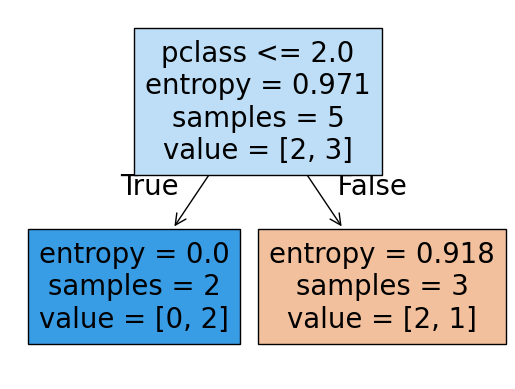

In [9]:


entropy_tree = ''
dtree = DecisionTreeClassifier(max_depth=1, criterion='entropy')
dtree.fit(X, y)
entropy_tree = plot_tree(dtree, feature_names=X.columns, filled=True)



# Answer check
entropy_tree

### Summary of Entropy and Decision Trees Activity

This notebook explored the practical application of entropy in decision tree splitting through 5 key exercises:

1. **Computing Base Entropy**
   - Calculated entropy for the entire Titanic dataset sample (5 records)
   - Used the formula H = -Σ p_i * log2(p_i)
   - Demonstrated how to handle binary classification entropy

2. **Split-based Entropy**
   - Analyzed entropy when splitting on passenger class (pclass)
   - Showed that pure nodes (all same class) have 0 entropy
   - Calculated entropy for mixed nodes

3. **Weighted Entropy**
   - Introduced the concept of weighted entropy based on node sizes
   - Demonstrated how to combine entropy from multiple nodes
   - Weighted by proportion of samples in each node

4. **Alternative Split Analysis**
   - Evaluated entropy for age-based split (age < 23)
   - Compared different splitting criteria
   - Showed how different features produce different entropy values

5. **Decision Tree Implementation**
   - Used sklearn's DecisionTreeClassifier with entropy criterion
   - Visualized the optimal split using plot_tree
   - Demonstrated how the algorithm automatically selects best split

**Key Takeaways:**
- Entropy measures the impurity/uncertainty in a dataset
- Lower entropy indicates better splits
- Pure nodes (single class) have 0 entropy
- Weighted entropy considers both node purity and size
- Decision trees automatically select splits that minimize entropy